**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [102]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



# import data 2C_weka.csv for 2 Class Classifcation.


In [103]:
df = pd.read_csv('2Classdata.csv')


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [9]:
#head and tail and missing values
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


array(['Abnormal', 'Normal'], dtype=object)

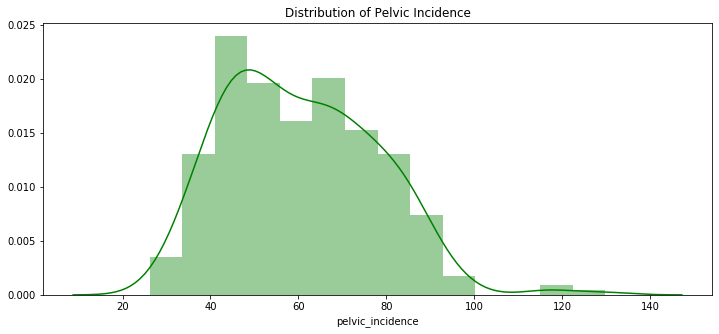

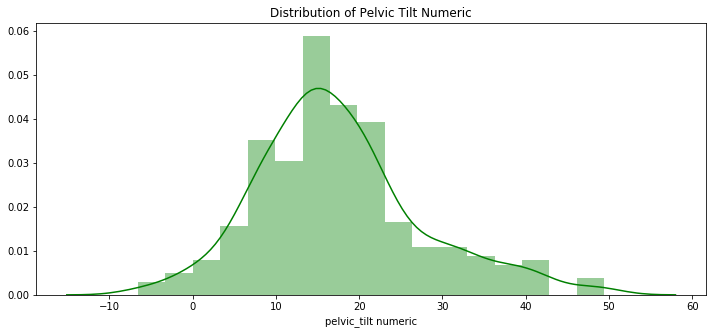

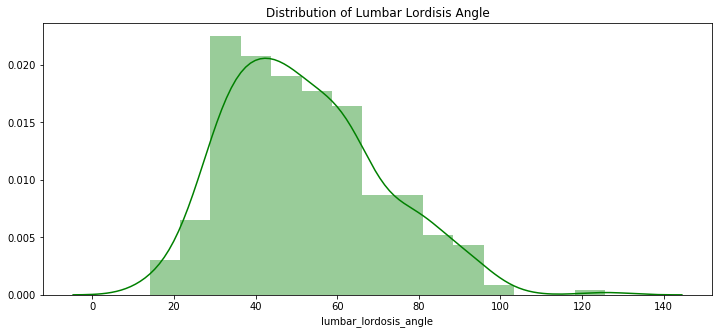

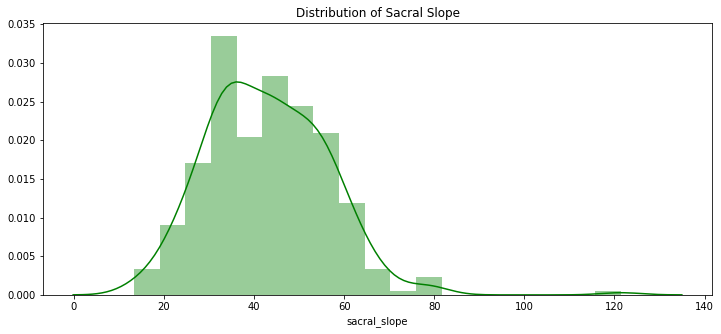

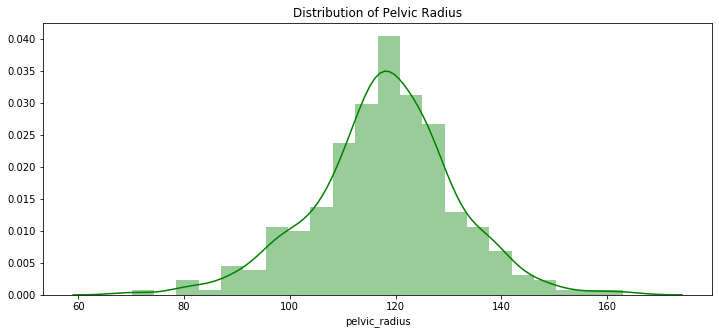

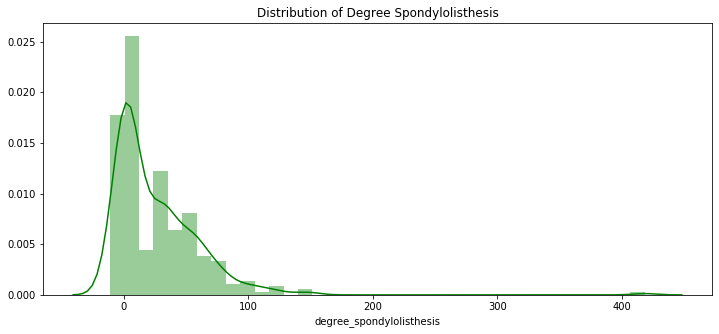

In [19]:

#Distribution of ‘Pelvic Incidence’ 
pl.figure(figsize=(12,5))
pl.title("Distribution of Pelvic Incidence")
ax = sns.distplot(df["pelvic_incidence"], color = 'g')


#Distribution of ‘Pelvic Incidence’ 
pl.figure(figsize=(12,5))
pl.title("Distribution of Pelvic Tilt Numeric")
ax = sns.distplot(df["pelvic_tilt numeric"], color = 'g')


#Distribution of ‘Pelvic Incidence’ 
pl.figure(figsize=(12,5))
pl.title("Distribution of Lumbar Lordisis Angle")
ax = sns.distplot(df["lumbar_lordosis_angle"], color = 'g')


#Distribution of ‘Pelvic Incidence’ 
pl.figure(figsize=(12,5))
pl.title("Distribution of Sacral Slope")
ax = sns.distplot(df["sacral_slope"], color = 'g')


#Distribution of ‘Pelvic Incidence’ 
pl.figure(figsize=(12,5))
pl.title("Distribution of Pelvic Radius")
ax = sns.distplot(df["pelvic_radius"], color = 'g')


#Distribution of ‘Pelvic Incidence’ 
pl.figure(figsize=(12,5))
pl.title("Distribution of Degree Spondylolisthesis")
ax = sns.distplot(df["degree_spondylolisthesis"], color = 'g')

df['class'].unique()

/Users/mridulchatterjee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]


Text(0.5, 1.0, 'Distribution')

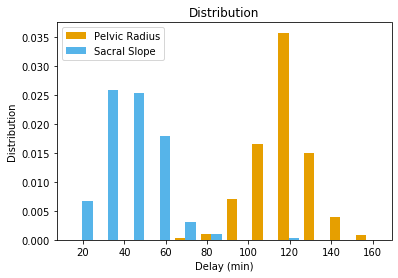

In [41]:
#Datatypes

df.dtypes

# Distribution for Pelvic Radius and Sacral Slope
x1 = df['pelvic_radius']
x2 = df['sacral_slope']

colors = ['#E69F00', '#56B4E9']
names = ['Pelvic Radius', 'Sacral Slope']
         
plt.hist([x1, x2], bins = int(180/15), normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Distribution')
plt.title('Distribution')

# Encode the Class variable to integer.

In [114]:
df['class'].value_counts()
df['class'] = [1 if each == 'Abnormal' else 0 for each in df['class']]
df['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [116]:
y = df['class']
x = df.drop(['class'], axis = 1)
x.shape

(310, 6)

In [117]:

y.shape

(310,)

# Normalize your Data (X) to get values between 0 to 1.

In [118]:
x = (x - np.min(x))/(np.max(x) - np.min(x))
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
5,0.136009,0.365744,0.099559,0.119943,0.647879,0.030933
6,0.263150,0.400439,0.207316,0.223960,0.542916,0.039680
7,0.185356,0.309190,0.134581,0.196592,0.507455,0.000890
8,0.170151,0.358811,0.256759,0.156294,0.590614,0.056674
9,0.101638,0.206581,0.250118,0.169425,0.152264,0.027287


# Split the dat as train and test with a ratio of 70:30.

In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [122]:
from sklearn.neighbors import KNeighborsClassifier


In [123]:
# train test split
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier()
x,y = df.loc[:,df.columns != 'class'], df.loc[:,'class']
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [124]:
prediction = knn.predict(x_test)


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [125]:
print('With KNN (K=5) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=5) accuracy is:  0.7956989247311828


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

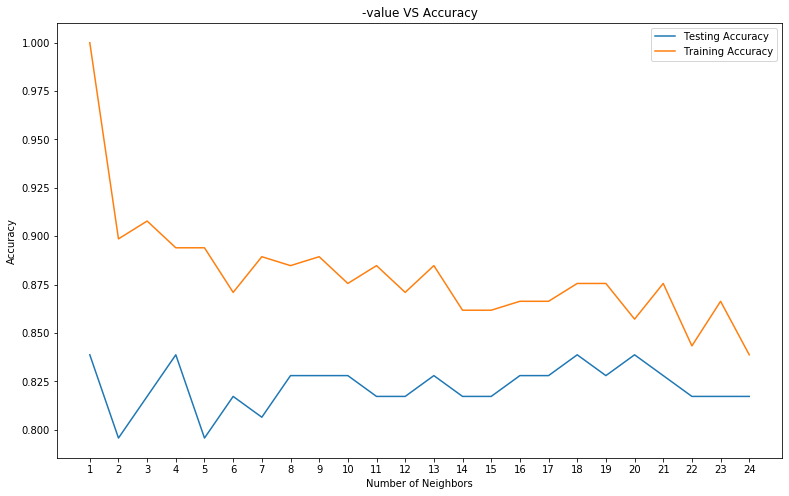

Best accuracy is 0.8387096774193549 with K = 1


In [126]:
# function to check the best fit for K from 1-25 range
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [128]:
df2 = pd.read_csv(r'3Classdata.csv')
df2.head()
 

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [129]:
#head and tail and missing values
df2.head()
df2.tail()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


/Users/mridulchatterjee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]


Text(0.5, 1.0, 'Distribution')

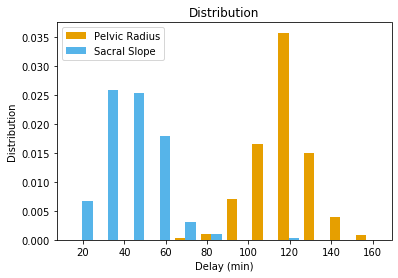

In [131]:
#Datatypes

df2.dtypes

# Distribution for Pelvic Radius and Sacral Slope
x1 = df2['pelvic_radius']
x2 = df2['sacral_slope']

colors = ['#E69F00', '#56B4E9']
names = ['Pelvic Radius', 'Sacral Slope']
         
plt.hist([x1, x2], bins = int(180/15), normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Distribution')
plt.title('Distribution')

In [132]:
#Encode Class Variable Integer

In [133]:
df2['class'].value_counts()
df2['class'] = [1 if each == 'Abnormal' else 0 for each in df2['class']]
df2['class'].head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [150]:
# Create the X(Feature-set) and Y(Target-set) sets for your Data.
y_new = df2['class']
x_new = df2.drop(['class'], axis = 1)
x_new.shape

(310, 6)

In [151]:
y_new.shape

(310,)

In [152]:
# Normalize your Data (X) to get values between 0 to 1.

x_new = (x_new - np.min(x_new))/(np.max(x_new) - np.min(x_new))
x_new

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
5,0.136009,0.365744,0.099559,0.119943,0.647879,0.030933
6,0.263150,0.400439,0.207316,0.223960,0.542916,0.039680
7,0.185356,0.309190,0.134581,0.196592,0.507455,0.000890
8,0.170151,0.358811,0.256759,0.156294,0.590614,0.056674
9,0.101638,0.206581,0.250118,0.169425,0.152264,0.027287


In [153]:
# Split the dat as train and test with a ratio of 70:30.

from sklearn.model_selection import train_test_split
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size = 0.3, random_state = 42)

In [158]:
# Build the KNN model using Train Dataset and predict the class on test dataset.

from sklearn.neighbors import KNeighborsClassifier
# train test split
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier()
x_new,y_new = df2.loc[:,df2.columns != 'class'], df2.loc[:,'class']
knn.fit(x_train_new,y_train_new)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [159]:
prediction2 = knn.predict(x_test_new)


In [160]:
# Calculate the performance score of of your classification on test dataset.
#Hint- You can use knn.score( ) function.

print('With KNN (K=5) accuracy is: ',knn.score(x_test_new,y_test_new)) # accuracy

With KNN (K=5) accuracy is:  1.0


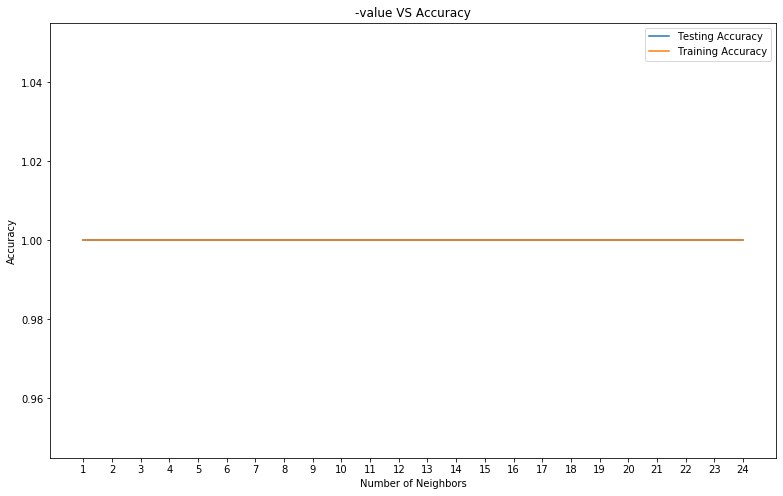

Best accuracy is 1.0 with K = 1


In [161]:
# What is the best K value for your classifcation?
#Find at which k value you get the best score.

# function to check the best fit for K from 1-25 range
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train_new,y_train_new)
    #train accuracy
    train_accuracy.append(knn.score(x_train_new, y_train_new))
    # test accuracy
    test_accuracy.append(knn.score(x_test_new, y_test_new))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))